In [1]:
import gym
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd
from agents import *

In [3]:
# train david's agent
david_agent = DavidAgent(env_name='CartPole-v1')
history = david_agent.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_david.pth')

Episode: 100 | score: 33.11822864961538
Episode: 200 | score: 49.68183444368197
Episode: 300 | score: 57.57484377750019
Episode: 400 | score: 106.76678366855351
Episode: 500 | score: 109.55619584271082
Episode: 600 | score: 133.65385328677993
Episode: 700 | score: 132.73608212298353
Episode: 800 | score: 200.77858113164766
Episode: 900 | score: 177.88764610186013
Episode: 1000 | score: 137.10735959907583
Episode: 1100 | score: 274.80234034359745
Episode: 1200 | score: 220.77654826111063
Episode: 1300 | score: 278.70059678710044
Episode: 1400 | score: 172.51159845678907
Episode: 1500 | score: 335.14726540140765
Episode: 1600 | score: 252.07132739530596
Episode: 1700 | score: 263.8808093916498
Episode: 1800 | score: 287.39117342015606
Episode: 1900 | score: 120.12075486532808
Episode: 2000 | score: 192.26156911878277


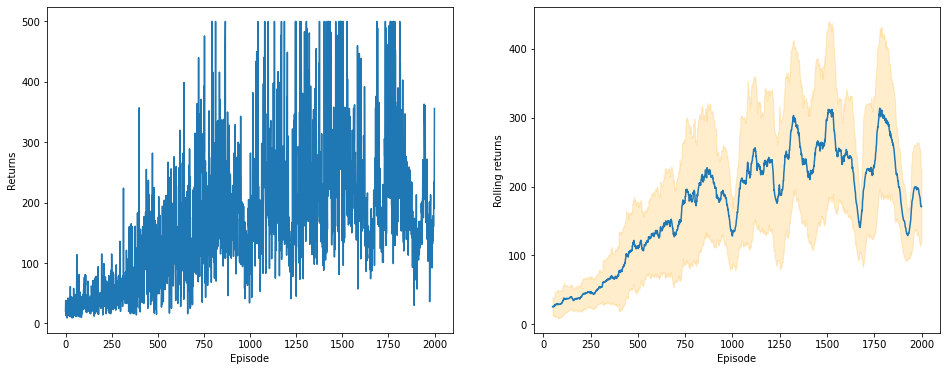

In [4]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

In [2]:
# train sutton's agent
sutton_agent = SuttonAgent(env_name='CartPole-v1')
history = sutton_agent.update_policy(
    max_episodes=2000,
    save_pth='saved_models/cartpole_reinforce_sutton.pth')

Episode: 100 | score: 67.78425570560667
Episode: 200 | score: 54.60995977148138
Episode: 300 | score: 86.30354980120978
Episode: 400 | score: 67.33043899038174
Episode: 500 | score: 101.93150285669896
Episode: 600 | score: 111.82974149813819
Episode: 700 | score: 62.33875868388837
Episode: 800 | score: 131.6189605775472
Episode: 900 | score: 108.74563278107229
Episode: 1000 | score: 108.5907748642766
Episode: 1100 | score: 82.16483502564856
Episode: 1200 | score: 179.8157499913671
Episode: 1300 | score: 205.68447124494168
Episode: 1400 | score: 115.56391512627057
Episode: 1500 | score: 194.82138892443956
Episode: 1600 | score: 173.36513461605097
Episode: 1700 | score: 147.04727081782926
Episode: 1800 | score: 81.11319411354661
Episode: 1900 | score: 207.43765845031558
Episode: 2000 | score: 87.25009121408286


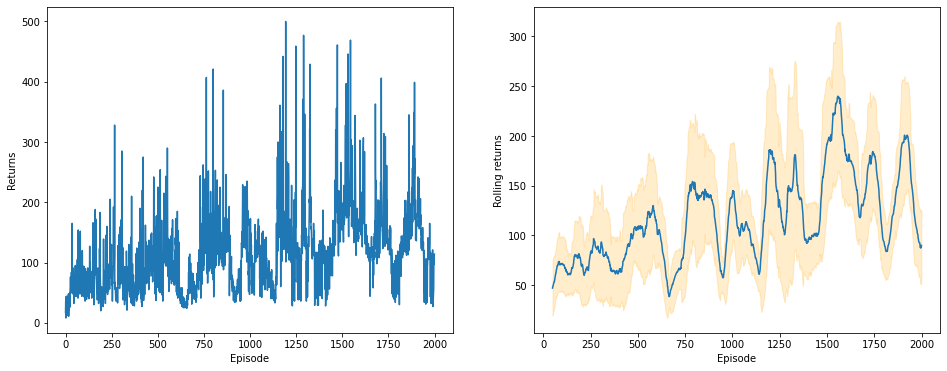

In [3]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

From this basic experiment, it seems like both models can learn, although the returns are higher with the David's version of learning. One thing would be to run the trained agents on the game n number of times and comparing the returns generated by each agent

Things I don't understand right now:
1. One thing I found peculiar is that standardizing the rewards does wonders for David's version of the REINFORCE but when I standardize the rewards for Sutton's agent, the policy gradients explode leading to nan weights :/
2. I haven't tried changing the policy architecture, so will try different architectures as well